In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

### EDA Credit Risk Dataset

In [2]:
df = pd.read_csv("./Data/credit_risk_dataset.csv")

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.shape

(32581, 12)

In [5]:
print(df.dtypes)

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object


## Percentage of null values

In [6]:
df.loan_int_rate.isnull().sum()/ df.shape[0]

0.0956385623522912

In [7]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

C:\Users\silvi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\silvi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


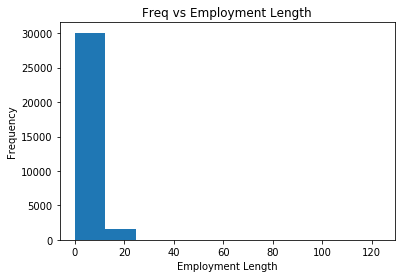

Text(0.5, 1.0, 'Freq vs Interest Rate')

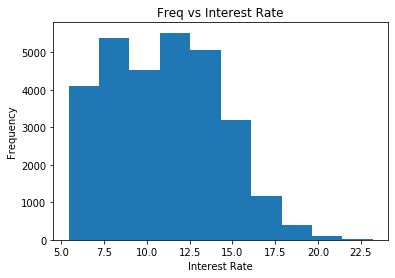

In [8]:
plt.hist(df['person_emp_length'])
plt.xlabel("Employment Length")
plt.ylabel("Frequency")
plt.title("Freq vs Employment Length")
plt.show()

plt.hist(df['loan_int_rate'])
plt.xlabel("Interest Rate")
plt.ylabel("Frequency")
plt.title("Freq vs Interest Rate")

In [9]:
# filling NaNs with the median values for both the loan interest rate and employment length variables, due to unnormal distribution

In [10]:
emp_len_null = df[df['person_emp_length'].isnull()].index
int_rate_null = df[df['loan_int_rate'].isnull()].index

df['person_emp_length'].fillna((df['person_emp_length'].median()), inplace=True)
df['loan_int_rate'].fillna((df['loan_int_rate'].median()), inplace = True)


In [11]:
# outlier check Age vs Interest Rate

Text(0.5, 1.0, 'Interest Rate vs Age')

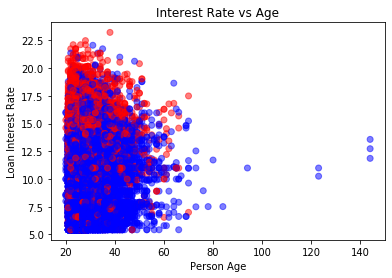

In [12]:
colors = ["blue","red"]
plt.scatter(df['person_age'], df['loan_int_rate'],
            c = df['loan_status'],
            cmap = mpl.colors.ListedColormap(colors), alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.title("Interest Rate vs Age")

In [13]:
# removing outliers for age > 100

In [14]:
df_clean1 = df[df['person_age']<=100]

df[df['person_age']>100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,10.99,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [15]:
# distribution of nr of loans based on loan_grade (credit assessment) and cb_person_default_on_file (credit default history)
pd.crosstab(df_clean1['cb_person_default_on_file'], df_clean1['loan_grade'])

loan_grade,A,B,C,D,E,F,G
cb_person_default_on_file,,,,,,,
N,10777,10448,3200,1750,499,129,28
Y,0,0,3256,1876,465,112,36


In [16]:
#distribution of mean interest rate by credit default history (Y/N) and loan_intent
pd.crosstab(df_clean1['cb_person_default_on_file'], df_clean1['loan_intent'], 
            values = df_clean1['loan_int_rate'], aggfunc = 'median')

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
cb_person_default_on_file,,,,,,
N,10.62,10.62,10.74,10.74,10.65,10.65
Y,14.09,13.85,14.09,14.11,14.10,13.99


In [17]:
# 0 is non-default, 1 = default

In [18]:
default_hist_status_tab = pd.crosstab(df_clean1['cb_person_default_on_file'], df_clean1['loan_status'])
default_hist_status_tab

loan_status,0,1
cb_person_default_on_file,,
N,21895,4936
Y,3573,2172


In [19]:
# number of customers whith no default/"bad credit" history
total1 = default_hist_status_tab.iloc[0].sum()
print(total1,"customers did not have a previous default history")

26831 customers did not have a previous default history


In [20]:
# number of customers with no default/"bad credit" history who have defaulted
defaulted1 = default_hist_status_tab.iloc[0,1]
print(defaulted1,"customers with no previous default history have defaulted")

4936 customers with no previous default history have defaulted


In [21]:
# customers with "bad credit" history
total2 = default_hist_status_tab.iloc[1].sum()
print(total2,"customers had a previous default history")

5745 customers had a previous default history


In [22]:
# number of customers with "bad credit" who have defaulted
defaulted2 = default_hist_status_tab.iloc[1,1]
print(defaulted2,"customers who previously defaulted have defaulted again")

2172 customers who previously defaulted have defaulted again


In [23]:
first_default = round(defaulted1 / total1 * 100, 2)
second_default = round(defaulted2 / total2 * 100, 2)

print("{}% of clients with no previous default history have defaulted.".format(first_default))
print("And {}% of clients who had previously defaulted, defaulted again.".format(second_default))

18.4% of clients with no previous default history have defaulted.
And 37.81% of clients who had previously defaulted, defaulted again.


In [24]:
# percentage of total defaults
total_default = round((defaulted1+defaulted2) / (total1+total2) *100,2)
print("{}% of total clients population have defaulted.".format(total_default))

21.82% of total clients population have defaulted.


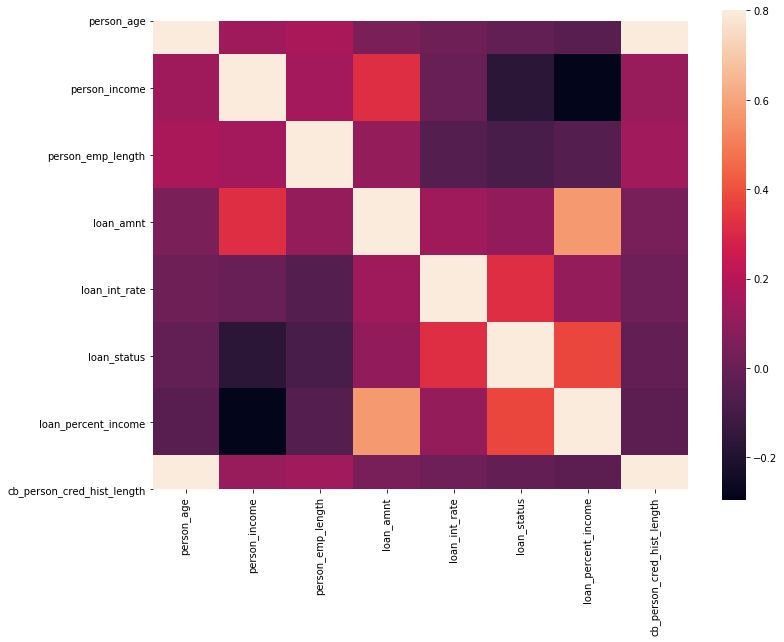

In [25]:
# Correlation matrix
corrmat = df_clean1.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

### ML Logistic Regression

In [26]:
from sklearn import model_selection,linear_model, metrics

In [27]:
# turning categorical values (object dtypes) into dummies

In [28]:
num_col = df_clean1.select_dtypes(exclude = 'object')
char_col = df_clean1.select_dtypes(include = 'object')

encoded_char_col = pd.get_dummies(char_col)

df_clean2 = pd.concat([num_col, encoded_char_col], axis=1)
df_clean2

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30,1,0,...,0,0,0,1,0,0,0,0,1,0
32577,54,120000,4.0,17625,7.49,0,0.15,19,1,0,...,0,1,0,0,0,0,0,0,1,0
32578,65,76000,3.0,35000,10.99,1,0.46,28,0,0,...,0,0,1,0,0,0,0,0,1,0
32579,56,150000,5.0,15000,11.48,0,0.10,26,1,0,...,0,0,1,0,0,0,0,0,1,0


In [29]:
# Split Train and Test Sets

In [30]:
Y = df_clean2['loan_status']
X = df_clean2.drop('loan_status',axis=1)
 


X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, random_state=2020, test_size=.30)


#Logisitc Regression

Default ('loan_status') is modelled as a function of:
- person_age
- person_income
- person_emp_length
        .
        .
        .
- loan_grade_G
- cb_person_default_on_file_N
- cb_person_default_on_file_Y

In [31]:
log_clf = linear_model.LogisticRegression()

log_clf.fit(X_train, np.ravel(y_train))

C:\Users\silvi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
col_effect = pd.DataFrame()
col_effect['col_names'] = X.columns
col_effect['col_coef'] = log_clf.coef_[0]
col_effect

,col_names,col_coef
0,person_age,-2.707894e-07
1,person_income,-4.042273e-05
2,person_emp_length,-8.048494e-08
3,loan_amnt,1.072347e-04
4,loan_int_rate,1.817229e-07
5,loan_percent_income,2.726256e-09
6,cb_person_cred_hist_length,-5.116713e-08
7,person_home_ownership_MORTGAGE,-1.831766e-08
8,person_home_ownership_OTHER,2.169211e-11
9,person_home_ownership_OWN,-1.289506e-08


In [33]:
initial_accuracy = round(log_clf.score(X_test,  y_test),2)
print("The initial accuracy is {}".format(initial_accuracy))

The initial accuracy is 0.81


### Feature importance

In [34]:
importance = log_clf.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.10f' % (i,v*1000000))

Feature: 0, Score: -0.2707894328
Feature: 1, Score: -40.4227336273
Feature: 2, Score: -0.0804849427
Feature: 3, Score: 107.2347161645
Feature: 4, Score: 0.1817228916
Feature: 5, Score: 0.0027262560
Feature: 6, Score: -0.0511671303
Feature: 7, Score: -0.0183176564
Feature: 8, Score: 0.0000216921
Feature: 9, Score: -0.0128950610
Feature: 10, Score: 0.0209016855
Feature: 11, Score: 0.0067181895
Feature: 12, Score: -0.0093947598
Feature: 13, Score: 0.0049759403
Feature: 14, Score: 0.0032304423
Feature: 15, Score: -0.0045865852
Feature: 16, Score: -0.0112325670
Feature: 17, Score: -0.0295468957
Feature: 18, Score: -0.0194554447
Feature: 19, Score: -0.0048033720
Feature: 20, Score: 0.0298503778
Feature: 21, Score: 0.0097519684
Feature: 22, Score: 0.0026591243
Feature: 23, Score: 0.0012549021
Feature: 24, Score: -0.0294109546
Feature: 25, Score: 0.0191216147


### Probability of default

In [35]:
predict_log = pd.DataFrame(log_clf.predict_proba(X_test)[:,1], columns=['prob_default'])

pred_df = pd.concat([y_test.reset_index(drop=True), predict_log],axis=1)
pred_df

# First column logisitic regression value, second column represents the probability of default (== 1)

,loan_status,prob_default
0,0,0.292627
1,0,0.006264
2,0,0.370784
3,0,0.495546
4,0,0.216225
...,...,...
9768,0,0.407435
9769,0,0.330147
9770,1,0.471314
9771,0,0.231118


### Two fictional characters

In [36]:
df_clean2.tail(5)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
32576,57,53000,1.0,5800,13.16,0,0.11,30,1,0,...,0,0,0,1,0,0,0,0,1,0
32577,54,120000,4.0,17625,7.49,0,0.15,19,1,0,...,0,1,0,0,0,0,0,0,1,0
32578,65,76000,3.0,35000,10.99,1,0.46,28,0,0,...,0,0,1,0,0,0,0,0,1,0
32579,56,150000,5.0,15000,11.48,0,0.10,26,1,0,...,0,0,1,0,0,0,0,0,1,0
32580,66,42000,2.0,6475,9.99,0,0.15,30,0,0,...,0,0,1,0,0,0,0,0,1,0


In [37]:
Andy_Ilse = [{'person_age': 30, 'person_income': 65000, 'person_emp_length': 1, 'loan_amnt': 35000, 'loan_int_rate': 3.95, 'loan_status': 1, 'loan_percent_income': 0.53, 'cb_person_cred_hist_length': 3, 'person_home_ownership_MORTGAGE': 0, 'person_home_ownership_OTHER': 0, 'person_home_ownership_OWN': 0, 'person_home_ownership_RENT': 1, 'loan_intent_DEBTCONSOLIDATION': 0, 'loan_intent_EDUCATION': 0, 'loan_intent_HOMEIMPROVEMENT': 0, 'loan_intent_MEDICAL': 0, 'loan_intent_PERSONAL': 0, 'loan_intent_VENTURE': 1, 'loan_grade_A': 0, 'loan_grade_B': 1, 'loan_grade_C': 0, 'loan_grade_D': 0, 'loan_grade_E': 0, 'loan_grade_F': 0, 'loan_grade_G': 0, 'cb_person_default_on_file_N': 0, 'cb_person_default_on_file_Y': 1}, {'person_age': 29, 'person_income': 55000, 'person_emp_length': 0, 'loan_amnt': 15000, 'loan_int_rate': 2.75, 'loan_status': 1, 'loan_percent_income': 0.27, 'cb_person_cred_hist_length': 1, 'person_home_ownership_MORTGAGE': 0, 'person_home_ownership_OTHER': 0, 'person_home_ownership_OWN': 0, 'person_home_ownership_RENT': 1, 'loan_intent_DEBTCONSOLIDATION': 0, 'loan_intent_EDUCATION': 0, 'loan_intent_HOMEIMPROVEMENT': 1, 'loan_intent_MEDICAL': 0, 'loan_intent_PERSONAL': 0, 'loan_intent_VENTURE': 1, 'loan_grade_A': 0, 'loan_grade_B': 0, 'loan_grade_C': 1, 'loan_grade_D': 0, 'loan_grade_E': 0, 'loan_grade_F': 0, 'loan_grade_G': 0, 'cb_person_default_on_file_N': 1, 'cb_person_default_on_file_Y': 0}]
Ilse = [{'person_age': 29, 'person_income': 55000, 'person_emp_length': 0, 'loan_amnt': 15000, 'loan_int_rate': 2.75, 'loan_status': 1, 'loan_percent_income': 0.27, 'cb_person_cred_hist_length': 1, 'person_home_ownership_MORTGAGE': 0, 'person_home_ownership_OTHER': 0, 'person_home_ownership_OWN': 0, 'person_home_ownership_RENT': 1, 'loan_intent_DEBTCONSOLIDATION': 0, 'loan_intent_EDUCATION': 0, 'loan_intent_HOMEIMPROVEMENT': 1, 'loan_intent_MEDICAL': 0, 'loan_intent_PERSONAL': 0, 'loan_intent_VENTURE': 1, 'loan_grade_A': 0, 'loan_grade_B': 0, 'loan_grade_C': 1, 'loan_grade_D': 0, 'loan_grade_E': 0, 'loan_grade_F': 0, 'loan_grade_G': 0, 'cb_person_default_on_file_N': 1, 'cb_person_default_on_file_Y': 0}]
df_characters = pd.DataFrame(Andy_Ilse)
df_characters

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,30,65000,1,35000,3.95,1,0.53,3,0,0,...,1,0,1,0,0,0,0,0,0,1
1,29,55000,0,15000,2.75,1,0.27,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [38]:
X = df_characters.drop('loan_status',axis=1)
y_pred = log_clf.predict(df_characters.drop('loan_status',axis=1))
print(df_characters)
print(y_pred)

   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          30          65000                  1      35000           3.95   
1          29          55000                  0      15000           2.75   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
0            1                 0.53                           3   
1            1                 0.27                           1   

   person_home_ownership_MORTGAGE  person_home_ownership_OTHER  ...  \
0                               0                            0  ...   
1                               0                            0  ...   

   loan_intent_VENTURE  loan_grade_A  loan_grade_B  loan_grade_C  \
0                    1             0             1             0   
1                    1             0             0             1   

   loan_grade_D  loan_grade_E  loan_grade_F  loan_grade_G  \
0             0             0             0             0   
1             0          

Prediction Andy defaults == 1, Ilse doesn't == 0.

### Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix
from collections import Counter

y_pred = log_clf.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7558  126]
 [1747  342]]


In [40]:
netMat = (y_pred == y_test)
log_clf.coef_
ind = np.where(y_test == 1)
Counter(y_pred[ind])
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,7558,126,7684
1,1747,342,2089
All,9305,468,9773


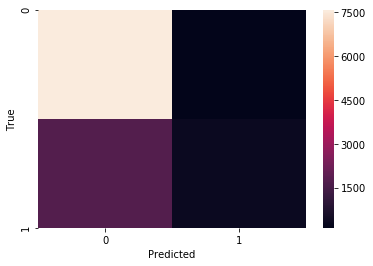

In [41]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=False)
plt.show()

98% true positive, 83% false negative  
!!!Attempt to improve true negative prediction

### Random Forrest

In [42]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
y_pred = rfc.predict(X_test)

C:\Users\silvi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [43]:
#Evaluating the classifier
#printing every score of the classifier
#scoring in any thing
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
Default = df_clean2[df_clean2['loan_status'] == 1]
n_outliers = len(Default)
n_errors = (y_pred != y_test).sum()
print("The model used is Random Forest classifier")
acc= accuracy_score(y_test,y_pred)
print("The accuracy is {}".format(acc))
prec= precision_score(y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(y_test,y_pred)
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9306251918551111
The precision is 0.961412688031393
The recall is 0.7036859741503112
The F1-Score is 0.812603648424544
The Matthews correlation coefficient is 0.7854240521876239


In [44]:
# Feature importance
importance = rfc.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.04258
Feature: 1, Score: 0.12658
Feature: 2, Score: 0.06154
Feature: 3, Score: 0.06597
Feature: 4, Score: 0.11394
Feature: 5, Score: 0.24208
Feature: 6, Score: 0.03233
Feature: 7, Score: 0.02886
Feature: 8, Score: 0.00102
Feature: 9, Score: 0.02235
Feature: 10, Score: 0.06117
Feature: 11, Score: 0.02416
Feature: 12, Score: 0.00933
Feature: 13, Score: 0.01116
Feature: 14, Score: 0.02566
Feature: 15, Score: 0.00767
Feature: 16, Score: 0.00711
Feature: 17, Score: 0.00856
Feature: 18, Score: 0.00342
Feature: 19, Score: 0.01286
Feature: 20, Score: 0.05681
Feature: 21, Score: 0.01531
Feature: 22, Score: 0.00604
Feature: 23, Score: 0.00374
Feature: 24, Score: 0.00607
Feature: 25, Score: 0.00368


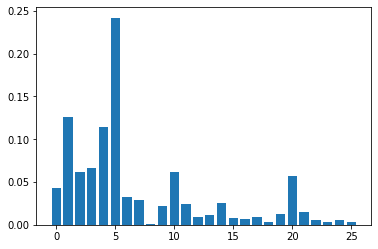

In [45]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [46]:
Y_pred = rfc.predict(X_test)
pd.crosstab(y_test, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,7625,59,7684
1,619,1470,2089
All,8244,1529,9773


99% true positive, Random Forrest model decreased the False Negatives from 83% (LogisticsRegression) to 29%.

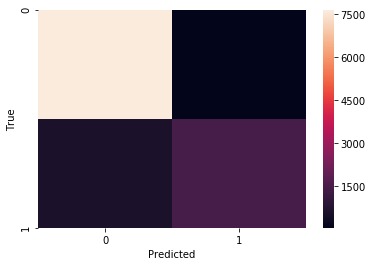

In [47]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=False)
plt.show()

In [48]:
# Andy or Ilse to default?
X = df_characters.drop('loan_status',axis=1)
y_pred = rfc.predict(df_characters.drop('loan_status',axis=1))
print(df_characters)
print(y_pred)

   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          30          65000                  1      35000           3.95   
1          29          55000                  0      15000           2.75   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
0            1                 0.53                           3   
1            1                 0.27                           1   

   person_home_ownership_MORTGAGE  person_home_ownership_OTHER  ...  \
0                               0                            0  ...   
1                               0                            0  ...   

   loan_intent_VENTURE  loan_grade_A  loan_grade_B  loan_grade_C  \
0                    1             0             1             0   
1                    1             0             0             1   

   loan_grade_D  loan_grade_E  loan_grade_F  loan_grade_G  \
0             0             0             0             0   
1             0          

### Principal Component Analysis

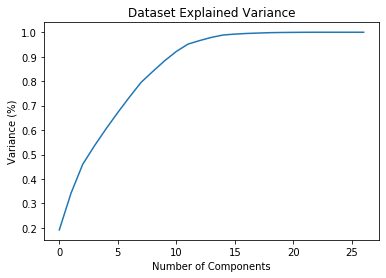

In [49]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# normalization for hyperparameter tunning
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(df_clean2)

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [50]:
# normalize data
from sklearn import preprocessing
from sklearn.decomposition import PCA

pie = df_clean2.drop('loan_status',axis=1)

data_scaled = pd.DataFrame(preprocessing.scale(pie),columns = pie.columns) 

# PCA
pca = PCA(n_components=14)
pca_val = pca.fit_transform(data_scaled)
pca_dataset = pd.DataFrame(pca_val)

In [51]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(pca_dataset, Y, random_state=2020, test_size=.32)

#Start of Classification Logistics Regression

log_clf = linear_model.LogisticRegression()

log_clf.fit(x_train, np.ravel(y_train))

C:\Users\silvi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
pca_predict_log = pd.DataFrame(log_clf.predict_proba(x_test)[:,1], columns=['prob_default'])
pca_pred_df = pd.concat([y_test.reset_index(drop=True), pca_predict_log],axis=1)
pca_pred_df

,loan_status,prob_default
0,0,0.442246
1,0,0.072371
2,0,0.105157
3,0,0.289018
4,0,0.095399
...,...,...
10420,1,0.650930
10421,1,0.030572
10422,0,0.016329
10423,0,0.239591


In the first column the logistic regression value for the dependent variabe is given, second value is the predicted probability of default.

In [53]:
pca_accuracy = round(log_clf.score(x_test,  y_test),2)
print("The accuracy of the Logisitic Regression Model upon PCA optimization is {}".format(pca_accuracy))

The accuracy of the Logisitic Regression Model upon PCA optimization is 0.86
